In [1]:
from esda.moran import Moran
import geopandas as gpd
import numpy as np
import pandas as pd
from libpysal.weights import Queen, KNN
from matplotlib import cm, colors
import matplotlib.pyplot as plt
from mgwr.gwr import GWR,MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import shift_colormap,truncate_colormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import multiprocessing as mp
from splot.esda import plot_moran
import statsmodels.api as sm

from statshelper import gwr_param_plots, q_q_plot
plt.style.use('dark_background')

In [2]:
df = pd.read_csv("./data/processed/Cleaned_Chicago_Sales.csv")
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf = gdf.set_crs("EPSG:4326")
gdf = gdf.to_crs("EPSG:26916")
gdf = gdf.sample(frac=.025)

In [3]:
i_vars = [
    'Age',
    'Bedrooms',  
    'Building Square Feet', 
    'Estimate (Building)', 
    'Estimate (Land)', 
    'Fireplaces', 
    'Full Baths',
    'Garage 1 Area',
    'Garage 2 Area', 
    'Half Baths', 
    'Land Square Feet',
    'Rooms',
    'Sale Quarter'
    ]
dep_var = ['Sale Price']
other_to_keep = ["PIN", "Neighborhood Code", "Town Code", "geometry"]
my_rows = i_vars+dep_var+other_to_keep
gdf = gdf[my_rows]
print("Dataframe has {} rows and {} columns".format(len(gdf), len(list(gdf.columns))))
X = gdf[i_vars].values
y = gdf[dep_var].values
gdf.head()

Dataframe has 8107 rows and 18 columns


,Age,Bedrooms,Building Square Feet,Estimate (Building),Estimate (Land),Fireplaces,Full Baths,Garage 1 Area,Garage 2 Area,Half Baths,Land Square Feet,Rooms,Sale Quarter,Sale Price,PIN,Neighborhood Code,Town Code,geometry
253166,-0.007590,-1.481514,-0.921160,-0.624442,-0.833224,-0.599533,-0.891279,0.550000,-0.041762,-0.848209,0.103799,-1.440712,-0.857915,-0.348934,18013070190000,52,21,POINT (432546.269 4629220.190)
266820,0.947740,-0.292681,0.024065,0.294176,0.206325,-0.599533,0.635637,0.550000,-0.041762,-0.848209,-0.583418,0.176677,-0.607519,0.480426,13272060090000,120,71,POINT (439333.299 4643135.871)
103387,-0.134968,-0.292681,-0.965293,-0.077903,-0.380349,-0.599533,-0.891279,0.550000,-0.041762,1.066654,-0.144991,-0.795788,-0.106728,0.177047,10161180400000,31,24,POINT (437117.345 4655713.256)
45338,-1.567962,1.205071,1.976401,1.752024,1.297492,2.605121,1.528825,-0.775107,-0.041762,1.066654,2.040988,1.207531,-1.358707,1.588446,3192030040000,71,38,POINT (418462.898 4661826.467)
206148,0.884051,-1.481514,-1.130648,-0.232719,-0.808369,-0.599533,-0.891279,-2.100215,-0.041762,-0.848209,-0.570925,-0.795788,-0.231926,-0.951432,15342090120000,210,31,POINT (429512.123 4631480.032)


In [4]:
coords = [ np.array((geom.xy[0][0], geom.xy[1][0])) for geom in gdf['geometry'] ]

In [5]:
gwr_selector = Sel_BW(coords, y, X)
gwr_bw = gwr_selector.search()
print("Selected optimal bandwidth is:", gwr_bw)

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.68151e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.82623e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.94227e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.48115e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.33828e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.48485e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.07441e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.44252e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.94452e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.59113e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=8.65207e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.84102e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.67677e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=8.25895e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=8.13958e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.52111e-34): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.24563e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=8.19369e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.32383e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.85464e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.17433e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.78433e-36): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.21208e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.95788e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=8.30889e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.99161e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.3843e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.27847e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.06931e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=8.0147e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-p

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.407e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.55598e-34): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.78548e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.58657e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.26499e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-p

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.00655e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.94838e-36): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=7.48248e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.58815e-38): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.61566e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.10794e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.27768e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=7.952e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.31437e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.69877e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-p

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.25467e-34): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.03905e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=8.56757e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.7651e-36): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.56316e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.08479e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.0106e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.25983e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.17327e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.24743e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.52274e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.77348e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.95871e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.2195e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.10525e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.84497e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.11671e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.04686e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.67436e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.55072e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.34867e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.21997e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.64997e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.74935e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.63423e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.74257e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.26782e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.8705e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.06775e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.35967e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.10017e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.25229e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.87707e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.2845e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.22572e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.52797e-34): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.80534e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.1226e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.97609e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.92283e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.45885e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.23132e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.87683e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.43302e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.45177e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.93521e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.77145e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.37724e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=7.16069e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.67136e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.41409e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.81743e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.97241e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.97561e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.29094e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.4506e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.54186e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.92343e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.05179e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.3566e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-p

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.30633e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.78237e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.66424e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.01939e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.33636e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=8.16577e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.31281e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.84512e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.55591e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.89494e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.27923e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=7.08991e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.99077e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.49965e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.18653e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.04755e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.0552e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.03449e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.86373e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.82183e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.33223e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.24604e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.11499e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.20807e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.40553e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.29985e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.55713e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.51562e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.00923e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.18831e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.4637e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.84522e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.91548e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=7.84316e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.13116e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.84191e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.21046e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.50806e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.7996e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.77343e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.81026e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.30559e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.1294e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.7293e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.25387e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-p

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.00854e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.0669e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.80399e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.55237e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.2697e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-p

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.42648e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.37543e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.75771e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.15646e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.82255e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.16194e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.38538e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.074e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.20183e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.15906e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-p

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.96495e-34): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.81558e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.63297e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.43225e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.58215e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.46301e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.11839e-34): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.08894e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.36755e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.61833e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.93642e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.70316e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.67011e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.21705e-36): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.8664e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.91849e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.48279e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.23741e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.87294e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.42262e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.92794e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=7.20921e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.89228e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.79304e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.2281e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.90437e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.42957e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.75548e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.01084e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.17982e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.07535e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.00134e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.15516e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.64814e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.01618e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.20098e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.22845e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.70047e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.97019e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.15388e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.12208e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.92512e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=7.50323e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.20717e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.79689e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.31322e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.89709e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.18247e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.49902e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=7.07764e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=7.19862e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.18924e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=7.96888e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.01884e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.08398e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.14508e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.86094e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.20624e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.15053e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.12433e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.39137e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.41144e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.29392e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.8775e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.54518e-37): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.18019e-34): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.44201e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.27504e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.18552e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.97986e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.34917e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=7.47295e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.04568e-34): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.38625e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=8.92486e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.10517e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.11671e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.17727e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.5812e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.30552e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.51021e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.65658e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.48427e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.91483e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.34848e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.85352e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.27525e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.99198e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.93062e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.86775e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.65169e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.26931e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.07428e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.92821e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.58248e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.98388e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.87839e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.14629e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.19869e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.91195e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.94491e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.09208e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.31906e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.48189e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.09547e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.03664e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.97089e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.71667e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.11603e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.00572e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.18729e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.31045e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.95713e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=7.13842e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.23841e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.4227e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.90372e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=7.53823e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.22053e-34): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.32481e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.85514e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.91724e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.8156e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.33748e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.35524e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.96812e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.53387e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.63162e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=8.42036e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=7.32743e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=9.85071e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=7.96077e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.01788e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.91494e-35): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.23703e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/home/lagrange/.local/lib/python3.8/site

Selected optimal bandwidth is: 1664.0


/home/lagrange/.local/lib/python3.8/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.52663e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)


In [6]:
gwr_results = GWR(coords, y, X, bw=gwr_bw).fit()

In [7]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                8107
Number of covariates:                                                    14

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                           2870.503
Log-likelihood:                                                   -7294.826
AIC:                                                              14617.652
AICc:                                                             14619.711
BIC:                                                             -69970.408
R2:                                                                   0.651
Adj. R2:                                                              0.651

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

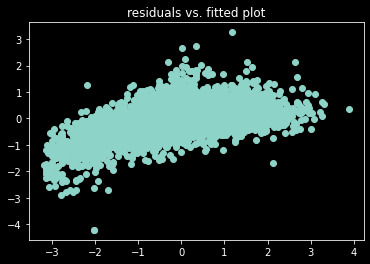

In [9]:
plt.scatter(gwr_results.y, gwr_results.resid_response.reshape(-1))
plt.title("residuals vs. fitted plot")
plt.show()

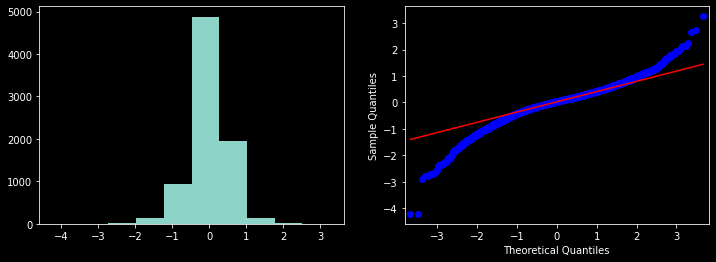

In [10]:
q_q_plot(gwr_results.resid_response.reshape(-1))

In [11]:
#w = DistanceBand.from_dataframe(gdf,threshold=800) # needed k large enough that it was connected
w = KNN.from_dataframe(gdf,k=64)
w.transform = 'R'

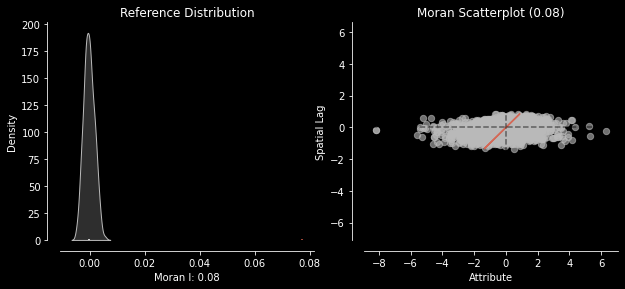

In [12]:
gwr_moran = Moran(gwr_results.resid_response.reshape(-1), w, permutations=199)
plot_moran(gwr_moran, zstandard=True, figsize=(10,4))
plt.show()

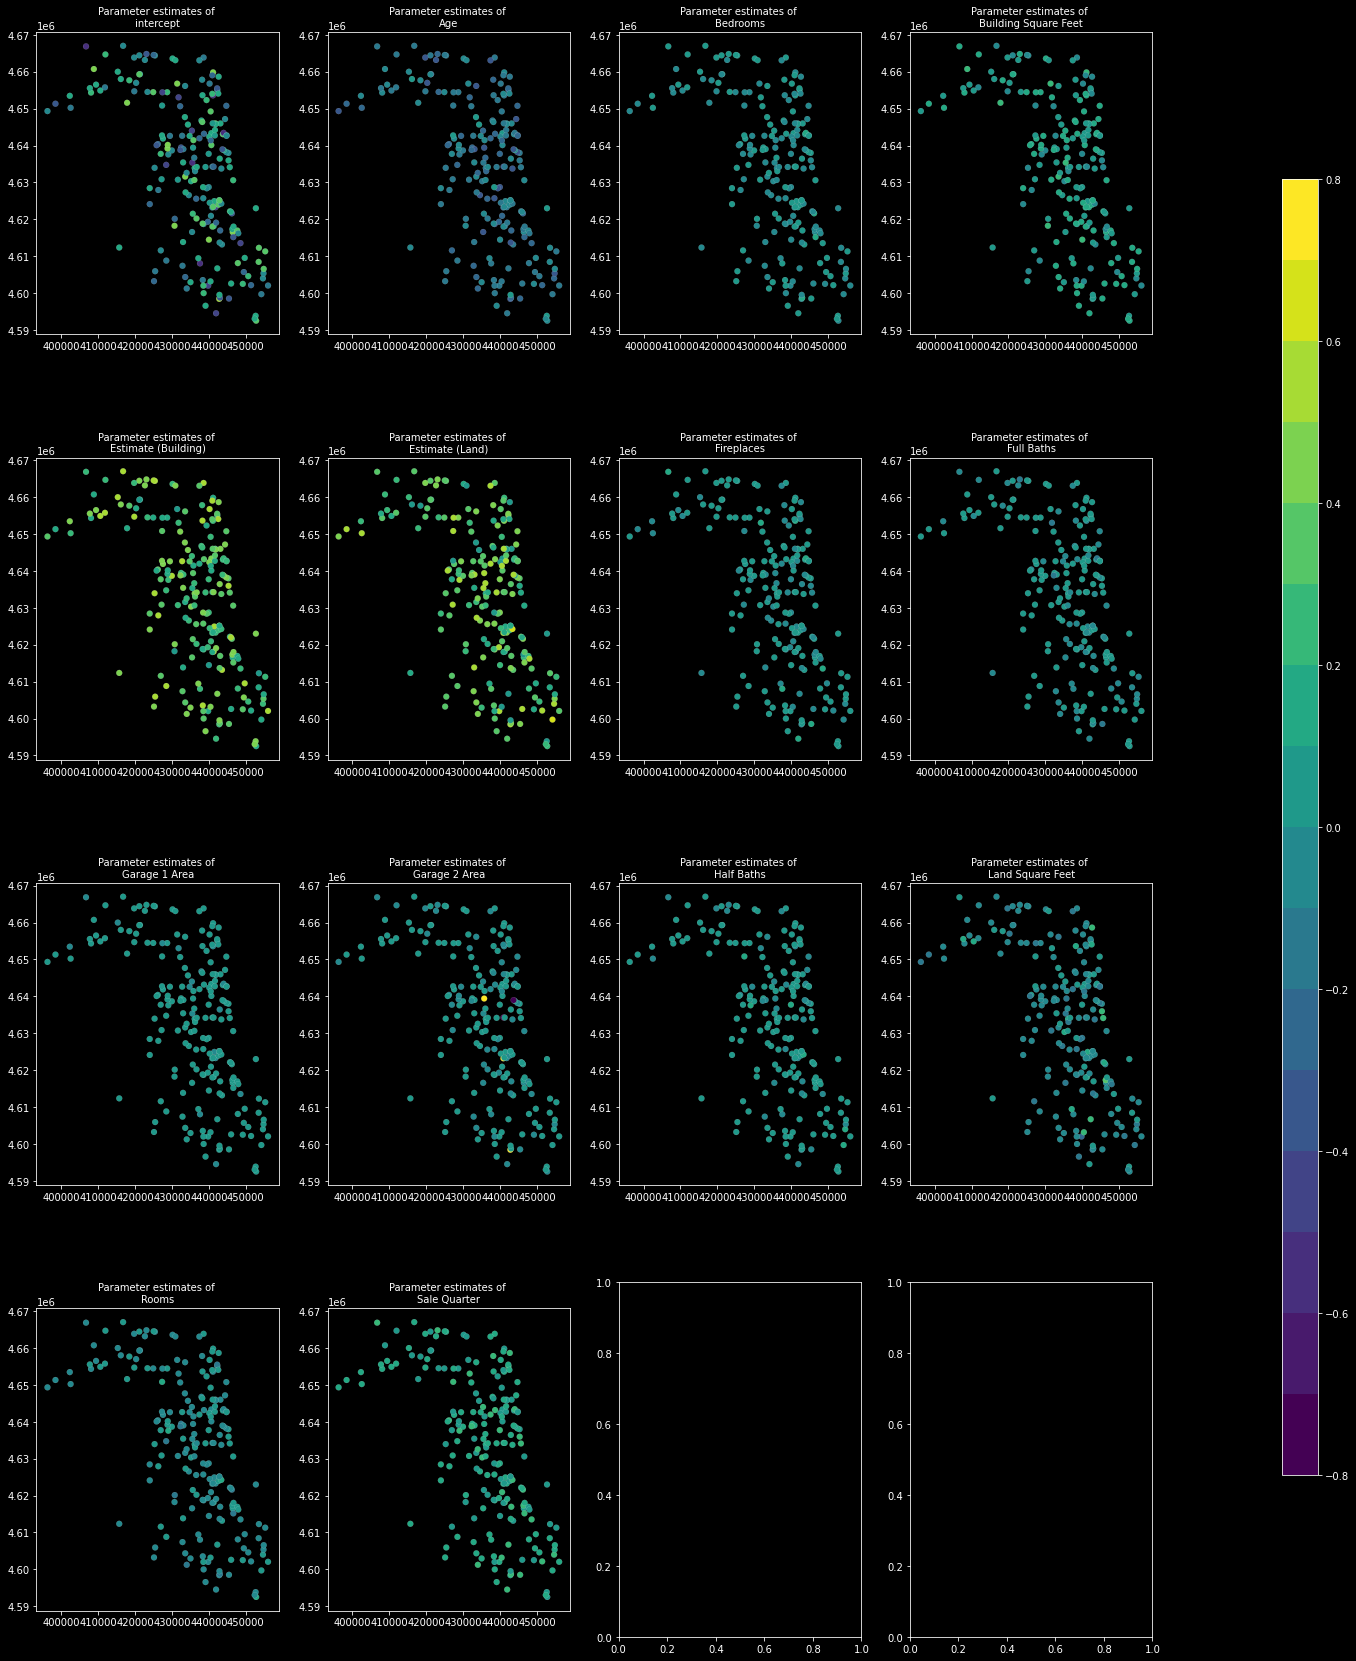

In [13]:
gwr_param_plots(gwr_results, gdf, names=["intercept"]+i_vars, subplots=(4,4), figsize=(20,30))

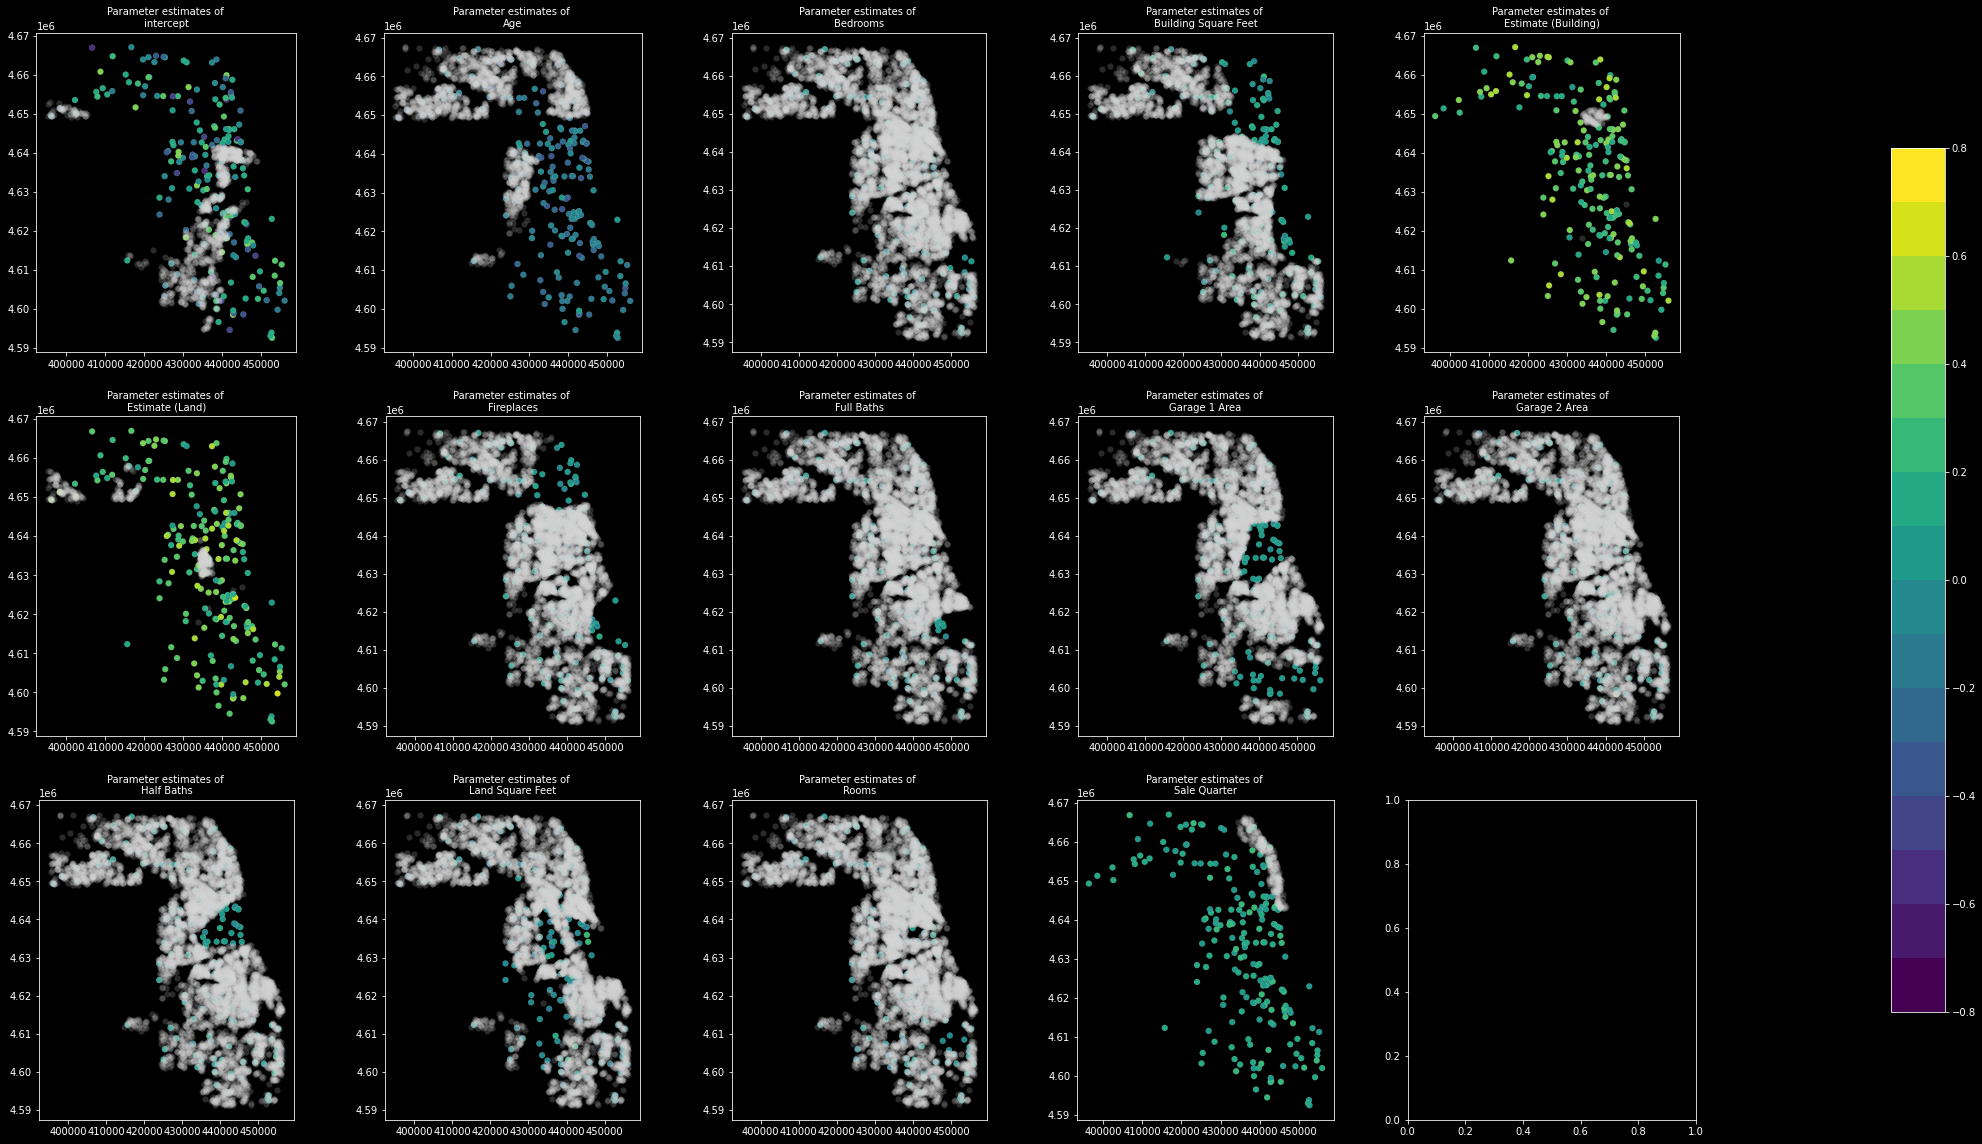

In [16]:
gwr_param_plots(gwr_results, gdf, names=["intercept"]+i_vars, subplots=(3,5), filter_t=True, figsize=(30,20))